# NKI Breast Cancer Data

This notebook serves as an example what you can do with the dataset. Exploratory data analysis and machine learning are covered. Some topics missing are data preprocessing, feature engineering and grid search.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import yellowbrick as yb

pd.set_option('display.max_columns', None)

#matplotlib inline

In [6]:
# load in dataset
data_raw = pd.read_csv("data/NKI_cleaned.csv")

In [8]:
# subset data (without uninterpretable features)
features_to_drop = data_raw.columns[16:]
data_subset = data_raw.drop(features_to_drop, axis=1)

For the moment we drop some of the more arcane features, this will increase the accuracy.

In [24]:
# data splitting
X = data_subset.drop(['Patient', 'ID', 'eventdeath'], axis=1)
y = data_subset['eventdeath']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Exploratory Data Analysis

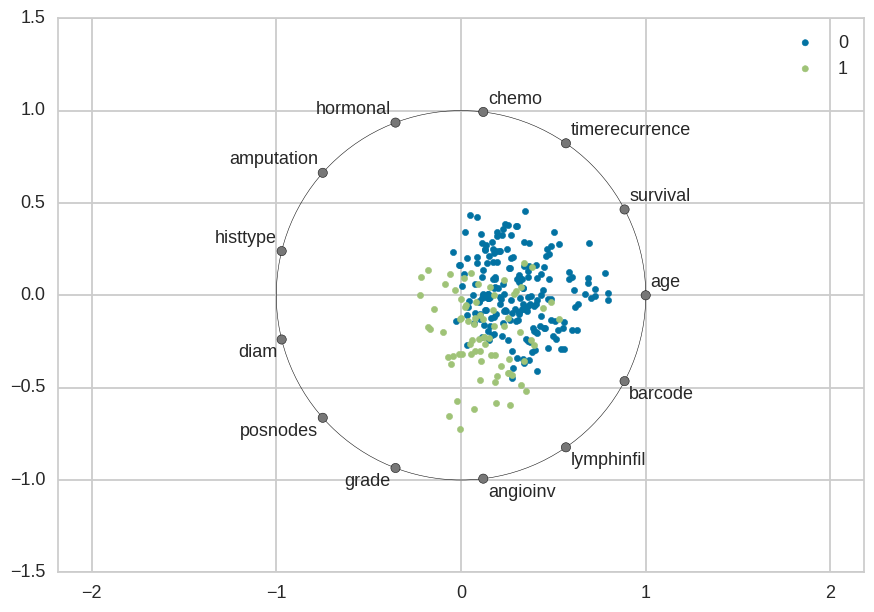

In [15]:
# visualise class separation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)

X_matrix = X.as_matrix()
y_matrix = y.as_matrix()

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

## Machine Learning

In this section we are running two models - a logistic regression and a decision tree. For one of them we also show a ROC curve.

In [17]:
# model training
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [18]:
# compute accuracy score
from sklearn.metrics import accuracy_score
logreg_acc_score = accuracy_score(y_test, logreg_pred)
print(logreg_acc_score)

0.933333333333


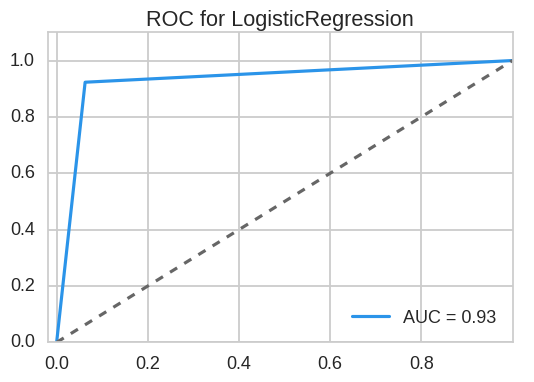

In [23]:
# plot ROC curve
from yellowbrick.classifier import ROCAUC
logreg_roc = ROCAUC(logreg)

logreg_roc.fit(X_train, y_train)
logreg_roc.score(X_test, y_test)
logreg_roc.poof()

In [29]:
# model training
from sklearn.tree import DecisionTreeClassifier
decreg = DecisionTreeClassifier()
decreg.fit(X_train, y_train)
decreg_pred = decreg.predict(X_test)

In [30]:
# compute accuracy score
decreg_acc_score = accuracy_score(y_test, decreg_pred)
print(decreg_acc_score)

0.855555555556


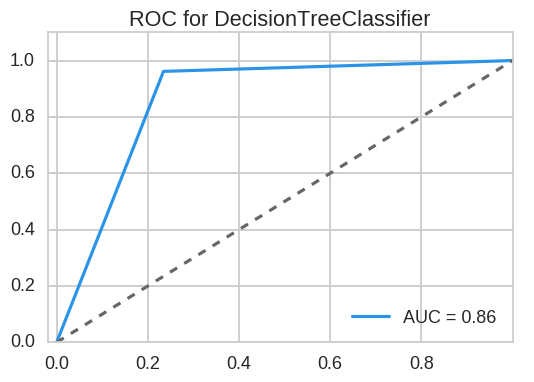

In [31]:
# plot ROC curve
decreg_roc = ROCAUC(decreg)

decreg_roc.fit(X_train, y_train)
decreg_roc.score(X_test, y_test)
decreg_roc.poof()